In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''') 

# <font color="#E56717">Comparative Effective Research</font>
## <font color="steelblue">Using SEER-Medicare to compare the efficacy and cost-effectiveness of different radiation treatment modalities for prostate cancer patients</font>

## IDA, 21 April 2017

### David Dooling

In [2]:
from IPython.display import IFrame

# <font color="#E56717">The Problem:</font>

* <span style="font-size:1.3em;">Two main classes of different types of external radiation beam therapy: $\gamma$ (photons) or other actual particles (protons in this case, but also research underway using carbon ions)</span>
* <span style="font-size:1.3em;">A $\gamma$-beam relatively inexpensive to generate, but less **controllable**. State of the art is $\bf{I}$ntensity $\bf{M}$odulated $\bf{R}$adiation $\bf{T}$herapy, but still causes collateral damage</span>
* <span style="font-size:1.3em;">$\bf{P}$roton $\bf{B}$eam $\bf{T}$herapy: More expensive to generate the particle beam, but causes much less collateral damage, based on plain physics and engineering principles</span>

###  <font color="red">Insurance companies pushing back; denying claims for PBT. Complicated appeal processes. Lack of clinical "evidence" given as justification. No RCT supporting the assumed benefits of PBT</font>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
matplotlib.style.use('fivethirtyeight')
matplotlib.style.use('seaborn-talk')
import os
import collections

import seaborn as sns
import sklearn as sk
import statsmodels as sm
from datetime import datetime


from IPython.display import Image
preDouble = "\\\\iobsdc01\\SharedDocs\\SEER_MEDICARE\\SEER_MEDICARE_STAGING"
new = os.chdir(preDouble)
#print(preDouble)

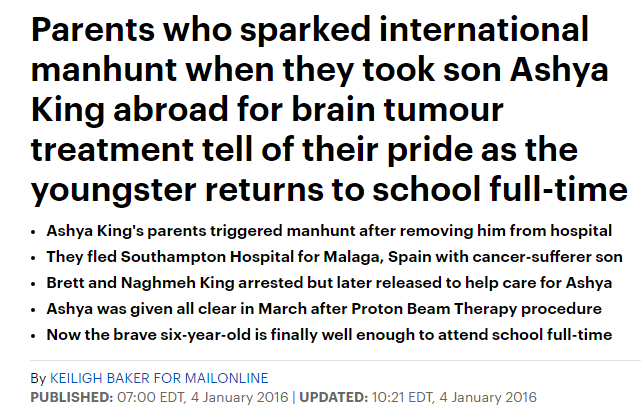

In [7]:
Image('ashyaking.png',embed=True)

# <font color="#E56717">Results of the sponsored Study:</font>

<span style="font-size:1.7em;">Using a novel patient matching technique (using KDtrees) to distill the signal from the noise in observational claims data, the results show:

* <span style="font-size:1.7em;">Statistically significant better survival prognosis for PBT patients compared to IMRT</span>
* <span style="font-size:1.7em;">PBT lower complication rate than IMRT for rectal, bladder, endocrine system, and renal problems</span>
* <span style="font-size:1.7em;">And for approximately 30% of the matched groups, PBT patients have lower cumulative cost than their matched counterparts</span>

## <font color="#E56717">Emotional appeals will not sway insurance companies. No RCT to point to; most practitioners will not knowingly give patients what they feel to be inferior treatment.</font>

# <font color="steelblue">Observational studies: Use the SEER-Medicare database</font>

<span style="font-size:1.5em;">The Surveillance, Epidemiology, and End Results (SEER) Program of the National Cancer Institute (NCI) is the most recognized authoritative source of information on cancer incidence and survival in the United States. SEER currently collects and publishes cancer incidence and survival data from population-based cancer registries covering approximately 28% of the US population</span>

# <font color="#E56717">Identify all the patients in the SEER-Medicare data who have received PBT</font>

<span style="font-size:1.7em;">Can be done via $\bf{H}$ealthcare $\bf{C}$ommon $\bf{P}$ocedure $\bf{C}$odes:</span>

* <span style="font-size:1.7em;">75520 - Proton trmt simple w/o comp</span>
* <span style="font-size:1.7em;">77522 - Proton trmt simple w/comp</span>
* <span style="font-size:1.7em;">77523 - Proton trmt intermediate</span>
* <span style="font-size:1.7em;">77525 - Proton treatment complex</span>

# <font color="#E56717">Likewise identify all patients who have received IMRT</font>

* <span style="font-size:1.7em;">77418 - Intensity modulated treatment delivery</span>

# <font color="steelblue">Then we need to perform patient "matching" in order to make the claim that any observed differences (survival, complication rates, total cost) are due to the different treatment regimens, and not to other factors or attributes of the patients that may differ between the PBT group and the IMRT group</font>

<span style="font-size:1.7em;">A simple example to illustrate the need for matching, and how it increases your ability to draw conclusions from data:</span>

<span style="font-size:1.7em;">Imagine a rental car agency that suspects that gasoline B get better miles per gallon than does gasoline A. The effect is $\bf{real}$, in the sense that if they use gasoline A for all cars one month at one location, and also use gasoline B at the sister location, gasoline B performs better</span>

<span style="font-size:1.7em;">But if you apply a standard unpaired t-test to see if this effect may be due to chance, you cannot rule out that it is in fact due to chance:</span>

In [9]:
import pandas as pd
import qgrid
qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folder
qgrid.set_defaults(remote_js=True, show_toolbar=True,
                  grid_options = {'enableColumnReorder': True,
                                 'defaultColumnWidth': 250})

gas_a_list =[27.01, 20, 23.41, 25.22, 30.11,
             25.55, 22.23, 19.78, 33.45, 25.22]

gas_b_list = [26.95, 20.44, 25.05, 26.32, 29.56,
             26.60, 22.93, 20.23, 33.95, 26.01]

dfgas = pd.DataFrame({'gas_a_mpg': gas_a_list,
                         'gas_b_mpg': gas_b_list})

In [10]:
dfgas # no signficance to the order of the two lists

,gas_a_mpg,gas_b_mpg
0,27.01,26.95
1,20.00,20.44
2,23.41,25.05
3,25.22,26.32
4,30.11,29.56
5,25.55,26.60
6,22.23,22.93
7,19.78,20.23
8,33.45,33.95
9,25.22,26.01


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
matplotlib.style.use('fivethirtyeight')
matplotlib.style.use('seaborn-talk')
import os
import collections

import seaborn as sns
import sklearn as sk
import statsmodels as sm
from datetime import datetime

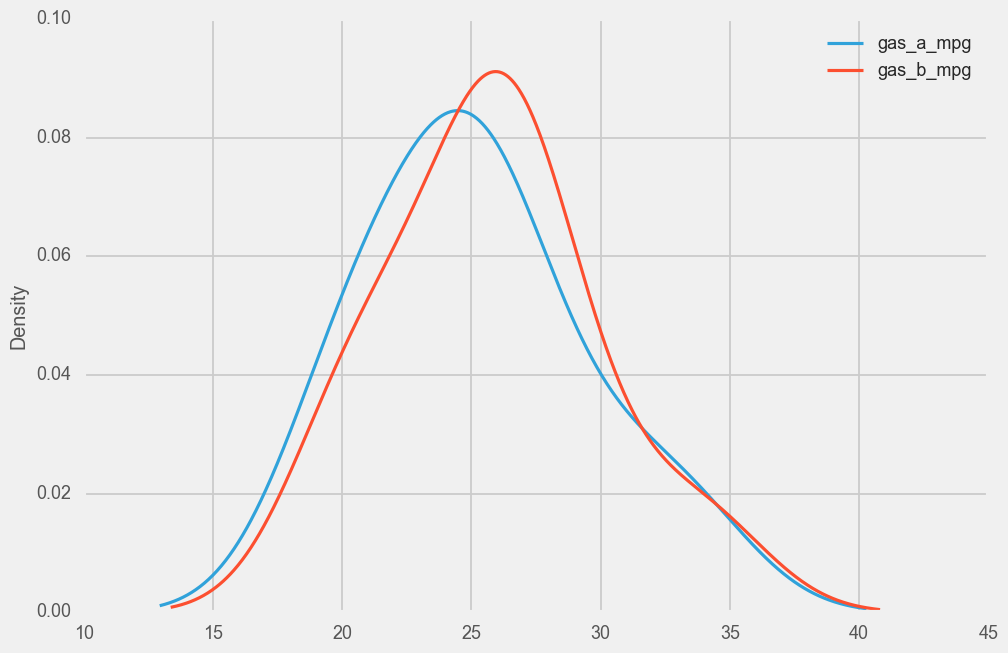

In [12]:
dfgas.plot.kde(); # Kenel density estimation of the distributions; not statiistcally different

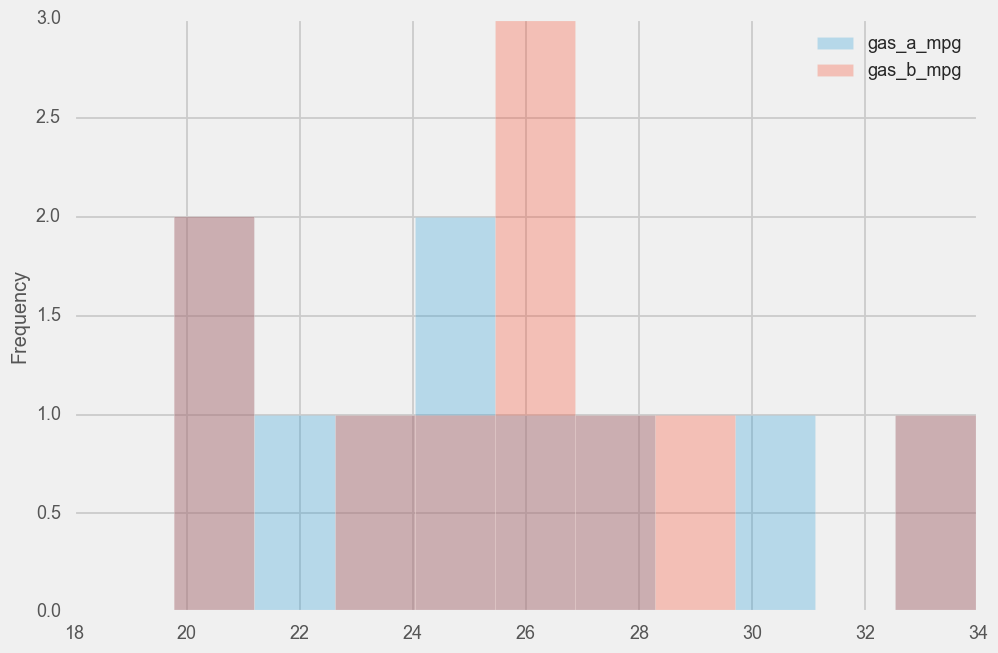

In [14]:
dfgas[['gas_a_mpg','gas_b_mpg']].plot(kind='hist',alpha=.3);

<span style="font-size:1.7em;">If you perform a standard, non-paired hypothesis test to see if the means differ, you conclude that it is just random luck and that there is no effect. The problem is that even though gas b is slightly better than gas a, the large standard deviations induce a large standard error - the mileages vary widely from one car to the next. Analogous to the situation with patients in the SEER-Medicare data.</span>

<span style="font-size:1.5em;">If you assign gas a and gas b to the $\bf{same}$ car on different days, and then record the milage, you can rule out the null hypothesis even with this small dataset. This happens because the standard deviations of the differences among the pairs are now small. This difference column, by comparing gas performance within a single car, eliminates the variability between cars.</span>

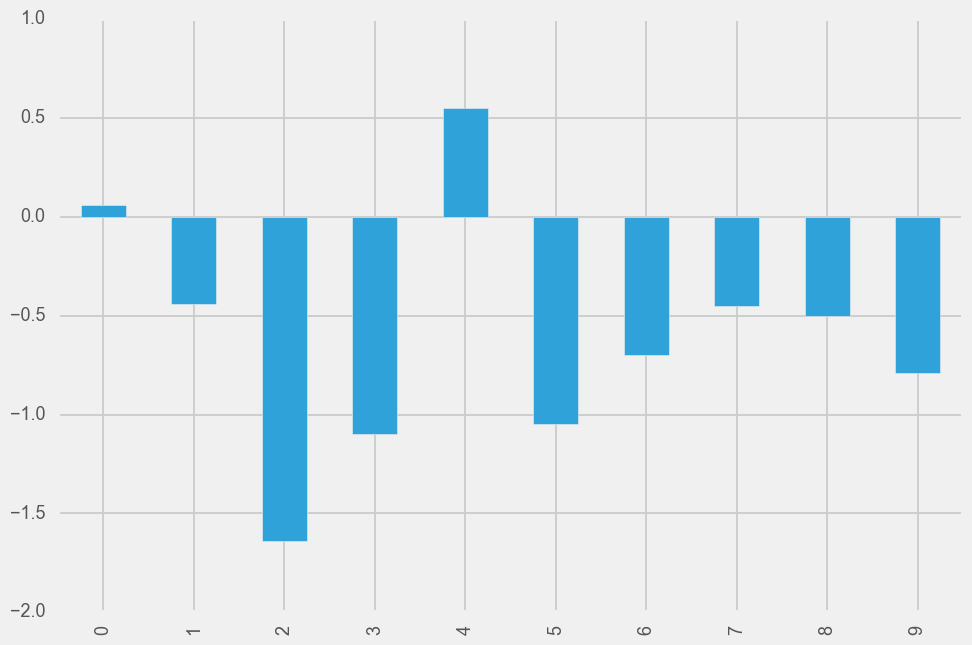

In [15]:
dfgas['diff'] = dfgas.gas_a_mpg - dfgas.gas_b_mpg
dfgas['diff'].plot(kind='bar');

In [16]:
from scipy.stats import ranksums, ttest_rel

ttest_rel(dfgas.gas_a_mpg.as_matrix(),
               dfgas.gas_b_mpg.as_matrix())

Ttest_relResult(statistic=-3.1196615512720802, pvalue=0.012325349247526556)

# <font color="#E56717">Features to use in the matching:</font>

* <span style="font-size:1.3em;">Marital Status</span>
* <span style="font-size:1.3em;">Race</span>
* <span style="font-size:1.3em;">Grade (a clinical attribute of the cancer)</span>
* <span style="font-size:1.3em;">Chemo (a binary variable indicating whether or not chemo was administered) (from claims)</span>
* <span style="font-size:1.3em;">Histology</span>
* <span style="font-size:1.3em;">How many "Fractions" were administered</span>
* <span style="font-size:1.3em;">Hispanic origin demographics</span>
* <span style="font-size:1.3em;">Stage of disease</span>
* <span style="font-size:1.3em;">Birth year</span>
* <span style="font-size:1.3em;">Year of Diagnosis</span>
* <span style="font-size:1.3em;">latitutde and longitude, derived from patient STATE and COUNTY FIPS codes</span>
* <span style="font-size:1.3em;">Charlson Comorbidity index (from claims)</span>
* <span style="font-size:1.3em;">Whether or not hormone therapy was part of treatment (from claims)</span>

# <font color="steelblue">Why not include the SEER tumor size variable?</font>

## It is missing for almost half the prostate patients, and for the cases where it is recorded as a number and not a categorical text value, it suffers from the End Digit Preference phenomena:

In [17]:
preDouble = "\\\\iobsdc01\\SharedDocs\\SEER_MEDICARE\\SEER_MEDICARE_STAGING"
new = os.chdir(preDouble)
#print(preDouble)

In [18]:
df = pd.read_pickle('dfpedsfFirsts.pickle')


In [19]:
cstum1mask =  (df['cstum1'] != "Unknown; size not stated; not stated in patient record") & \
(df['cstum1'] != "Microscopic focus or foci only; no size of focus is given") & \
(df['cstum1'] != "989 millimeters or larger") & \
(df['cstum1'] != "Not applicable") & \
(df['cstum1'] != "Unknown age") & \
(df['cstum1'] != "Described as less than 1 cm") & \
(df['cstum1'] != "Described as less than 2 cm") & \
(df['cstum1'] != "Described as less than 3 cm") & \
(df['cstum1'] != 'Indicates no mass or no tumor found; for example, when a tumor of a stated primary site is not found, but the tumor has metastasized') & \
(df['cstum1'] != "Described as less than 4 cm") & \
(df['cstum1'] != "Described as less than 5 cm") & \
(df['cstum1'] != "Not applicable") & \
(df['cstum1'] != 'Not applicable') & \
(df['cstum1'] != 996) & \
(df['cstum1'] != 997) & \
(df['cstum1'] != 998) & \
(df['srvm1'] != 9999)

# End-digit preference

<span style="font-size:1.5em;">"In converting analog to digital data, observers may record some terminal digits with an unusual frequency, for example rounding off may be to the nearest whole number, even number, multiple of 5 or 10, or when time units like a week arre involved, 7, 14, etc."</span>

* <span style="font-size:1.3em;">Encyclopedia of Epidemiologic Methods, by Mitchell H. Gail, Jacques Benichou</span>



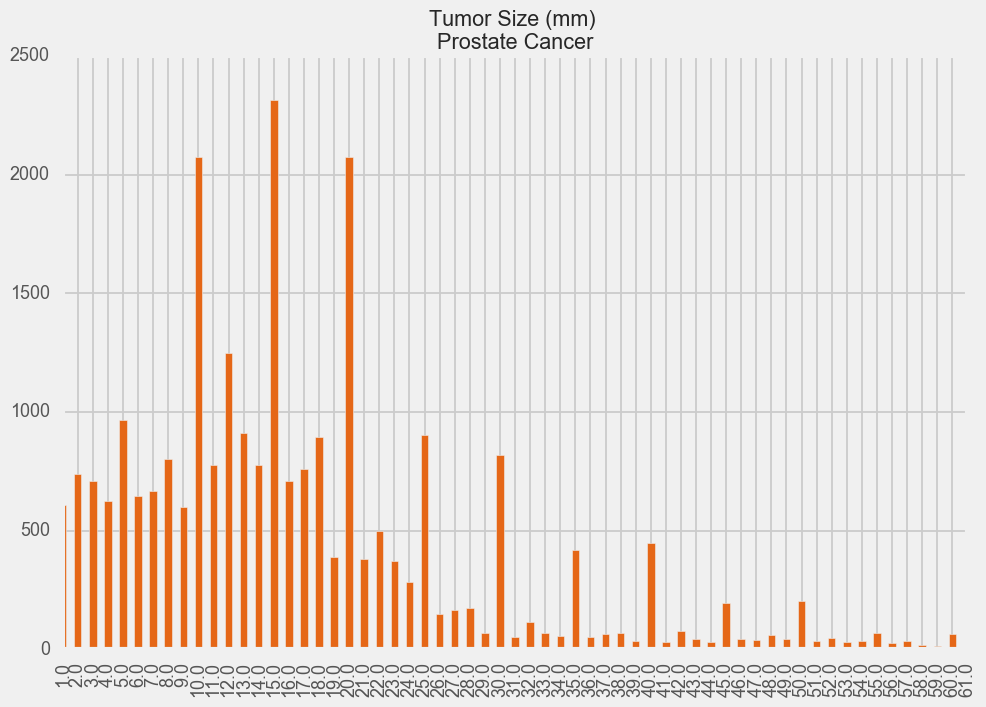

In [20]:
df[cstum1mask & df.siterwho1.str.contains("prostate",case=False,na=False)].cstum1.value_counts().sort_index().plot(kind='bar',
            title='Tumor Size (mm) \nProstate Cancer',color='#E56717');
plt.xlim(0,60);

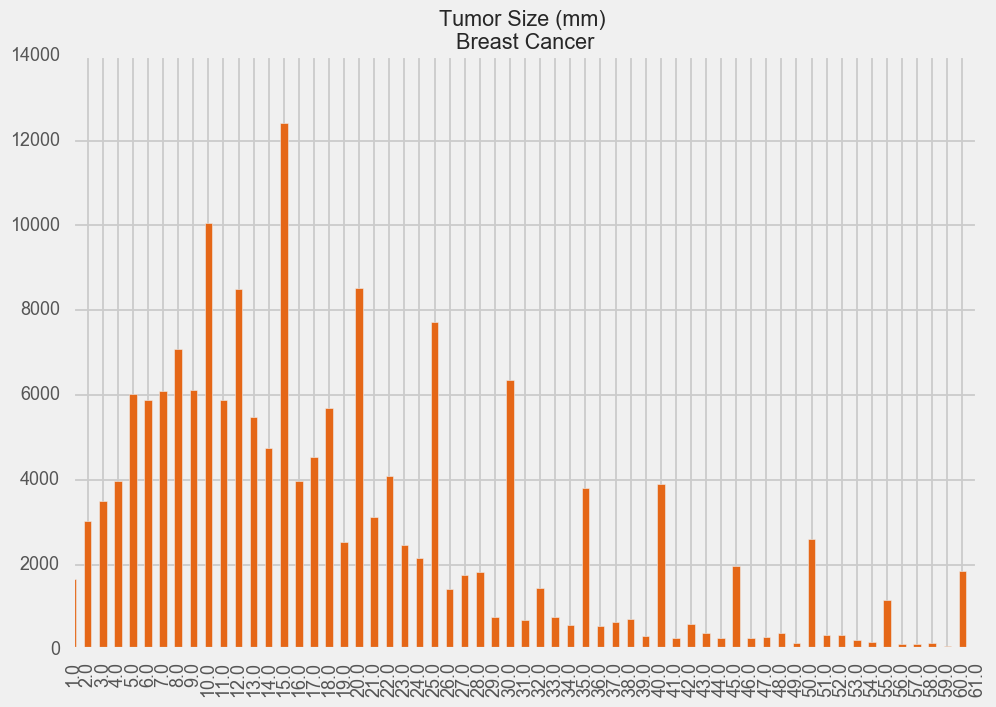

In [21]:
df[cstum1mask & df.siterwho1.str.contains("breast",case=False,na=False)].cstum1.value_counts().sort_index().plot(kind='bar',
            title='Tumor Size (mm) \nBreast Cancer',color='#E56717');
plt.xlim(0,60);

# <font color="#E56717">851 PBT patients and 28102 IMRT patients prior to matching</font>


<span style="font-size:1.7em;">Look at the Kaplan-Meier survival curve before matching</span>

<span style="font-size:1.7em;">$\bf{survival}$ $\bf{curve}, S(t)$ is a function that maps from a duration, $t$, to the probablity of surviving longer than $t$. If you know the distribution of durations, then the survival curve is just 1 minus the cumulative distribution function: $S(t) = 1 - CDF(t)$</span>



<span style="font-size:1.7em;">But we do not know the distribution of lifetimes directly: right-censored data. If some patients have died, we know their survival times. For patients that are still living at the end of the observation period, we don't know the survival time, but we do have some information: a lower bound. Kaplan-Meier curves take advantage of this extra information to form an estimate of a survival curve relevant to a group.</span>

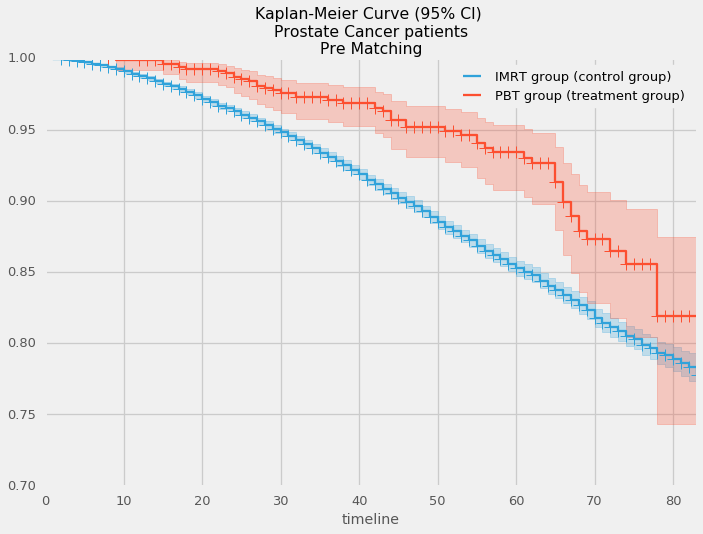

In [22]:
from IPython.display import Image
Image(filename="survival_pre_matching.png",embed=True)

In [23]:
# Now show the characteristics of the patients; League == 1 means PBT
df = pd.read_csv('everything_pre_matching.csv')

pd.set_option("display.max_columns", 999)

pd.set_option("display.max_rows", 999)

import qgrid
qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folder
qgrid.set_defaults(remote_js=True, show_toolbar=True,
                  grid_options = {'enableColumnReorder': True,
                                 'defaultColumnWidth': 250})

# <font color="#E56717">Perform patient matching using a KDtree</font>

<span style="font-size:1.7em;">Want to find patients that are as close to each other as possible in this high dimensional feature space. Traditionally done using something called propensity score matching (logitistic regression; linear). We can do much better thanks to modern computing capablity and this KDtree data structure.<span>

<span style="font-size:1.2em;">A K-d tree, or k-dimensional tree, is a data structure that is very useful for finding nearest neighbors in a k-dimensional space. The essential idea behind k-d trees is that any point (along with the problem bounds) defines a k-1 dimensional hyperplane that partitions the remaining space into two sections. For example, in 1D a point p on a line l will split the line into the space above p and the space below p. In two dimensions, a line will split a plane. In three dimensions, a plane will split a cube, and so on. The points in a k-d tree can then be placed into a structure similar to a binary search tree.</span> 

# <font color="#E56717">Here is a video explaining the construction of a KDTree</font>

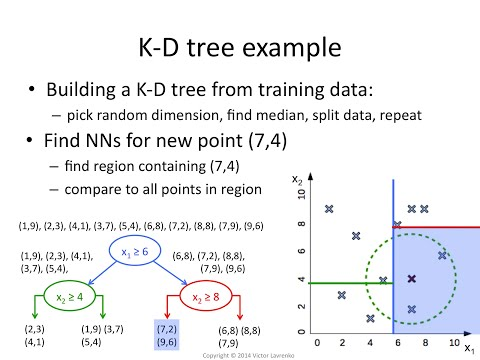

In [25]:
from IPython.display import YouTubeVideo
YouTubeVideo('Y4ZgLlDfKDg')

C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:54: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:55: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:64: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:65: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


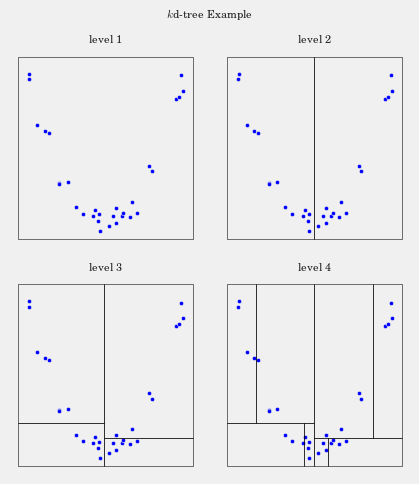

In [26]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


# We'll create a KDTree class which will recursively subdivide the
# space into rectangular regions.  Note that this is just an example
# and shouldn't be used for real computation; instead use the optimized
# code in scipy.spatial.cKDTree or sklearn.neighbors.BallTree
class KDTree:
    """Simple KD tree class"""

    # class initialization function
    def __init__(self, data, mins, maxs):
        self.data = np.asarray(data)

        # data should be two-dimensional
        assert self.data.shape[1] == 2

        if mins is None:
            mins = data.min(0)
        if maxs is None:
            maxs = data.max(0)

        self.mins = np.asarray(mins)
        self.maxs = np.asarray(maxs)
        self.sizes = self.maxs - self.mins

        self.child1 = None
        self.child2 = None

        if len(data) > 1:
            # sort on the dimension with the largest spread
            largest_dim = np.argmax(self.sizes)
            i_sort = np.argsort(self.data[:, largest_dim])
            self.data[:] = self.data[i_sort, :]

            # find split point
            N = self.data.shape[0]
            split_point = 0.5 * (self.data[N / 2, largest_dim]
                                 + self.data[N / 2 - 1, largest_dim])

            # create subnodes
            mins1 = self.mins.copy()
            mins1[largest_dim] = split_point
            maxs2 = self.maxs.copy()
            maxs2[largest_dim] = split_point

            # Recursively build a KD-tree on each sub-node
            self.child1 = KDTree(self.data[N / 2:], mins1, self.maxs)
            self.child2 = KDTree(self.data[:N / 2], self.mins, maxs2)

    def draw_rectangle(self, ax, depth=None):
        """Recursively plot a visualization of the KD tree region"""
        if depth == 0:
            rect = plt.Rectangle(self.mins, *self.sizes, ec='k', fc='none')
            ax.add_patch(rect)

        if self.child1 is not None:
            if depth is None:
                self.child1.draw_rectangle(ax)
                self.child2.draw_rectangle(ax)
            elif depth > 0:
                self.child1.draw_rectangle(ax, depth - 1)
                self.child2.draw_rectangle(ax, depth - 1)


#------------------------------------------------------------
# Create a set of structured random points in two dimensions
np.random.seed(0)

X = np.random.random((30, 2)) * 2 - 1
X[:, 1] *= 0.1
X[:, 1] += X[:, 0] ** 2

#------------------------------------------------------------
# Use our KD Tree class to recursively divide the space
KDT = KDTree(X, [-1.1, -0.1], [1.1, 1.1])

#------------------------------------------------------------
# Plot four different levels of the KD tree
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(wspace=0.1, hspace=0.15,
                    left=0.1, right=0.9,
                    bottom=0.05, top=0.9)

for level in range(1, 5):
    ax = fig.add_subplot(2, 2, level, xticks=[], yticks=[])
    ax.scatter(X[:, 0], X[:, 1], s=9)
    KDT.draw_rectangle(ax, depth=level - 1)

    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-0.15, 1.15)
    ax.set_title('level %i' % level)

# suptitle() adds a title to the entire figure
fig.suptitle('$k$d-tree Example')
plt.savefig('kd_tree_example.png')
#plt.show()

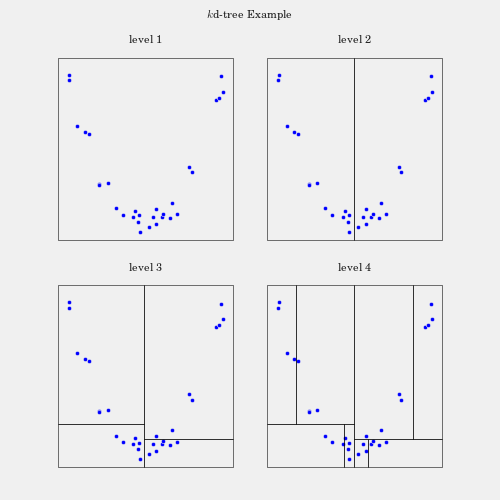

In [27]:
Image(filename="kd_tree_example.png",embed=True)

# <font color="#E56717">Results of the matching: 788 PBT patients and 3867 patients</font>

<span style="font-size:1.7em;">One to Many matching, with each IMRT patient associated with one and only one PBT patient</span>

<span style="font-size:1.7em;">Inspect the results of the matching</span>

<span style="font-size:1.7em;">And then look to see if there is a real difference signal in survival curves, complication rates and comparative cost</span>

In [82]:
import pickle
fileObject = open('one_to_many_dict.pickle', 'rb')
dd = pickle.load(fileObject)
fileObject.close()
df = pd.read_csv('everything_post_matching.csv')

In [83]:
df['patient_id'].dtype
df.patient_id = df.patient_id.astype(str)
df.patient_id = df.patient_id.apply(lambda x: x.rjust(10, '0'))

df.set_index('patient_id', inplace=True,drop=False)

In [84]:
df.columns

Index(['patient_id', 'group', 'marst1', 'srace', 'nhiade', 'patient_id.1',
       'grade1', 'site1', 'chemo', 'histrec1', 'dajccstg1', 'birthyr',
       'agedx1', 'countystate_1', 'yrdx1', 'elevation_1', 'lng_1', 'lat_1',
       'League', 'total_score', 'hormone', 'fraction', 'riskband', 'srvm1',
       'stat_rec'],
      dtype='object')

In [85]:
df.set_index('patient_id',inplace=True)

In [86]:
goodcols = ["group","League", "marst1", "srace", "nhiade", "grade1", "chemo", 
           "histrec1","dajccstg1","birthyr","agedx1","yrdx1","countystate_1",
           "total_score","hormone","fraction","riskband"]

In [87]:
df[goodcols].loc[list(set([list(dd.keys())[7]]).union(set(dd[list(dd.keys())[7]])))]

,group,League,marst1,srace,nhiade,grade1,chemo,histrec1,dajccstg1,birthyr,agedx1,yrdx1,countystate_1,total_score,hormone,fraction,riskband
patient_id,,,,,,,,,,,,,,,,,
8854064342,294,1,Married (including common law),White,Non-Spanish-Hispanic-Latino,Grade II; grade ii; grade 2; moderately differ...,0,8140-8398: adenomas and adenocarcinomas,Stage II,1931,75,2007,"Los Angeles County, CA",1.0,0.0,44.0,intermediate risk
8857073352,294,0,Married (including common law),White,Non-Spanish-Hispanic-Latino,Grade II; grade ii; grade 2; moderately differ...,0,8140-8398: adenomas and adenocarcinomas,Stage II,1931,76,2007,"Tulare County, CA",1.0,0.0,42.0,intermediate risk


In [88]:
df[goodcols].loc[['8856041492'] + dd['8856041492']]

,group,League,marst1,srace,nhiade,grade1,chemo,histrec1,dajccstg1,birthyr,agedx1,yrdx1,countystate_1,total_score,hormone,fraction,riskband
patient_id,,,,,,,,,,,,,,,,,
8856041492,273,1,Married (including common law),Filipino,Non-Spanish-Hispanic-Latino,Grade II; grade ii; grade 2; moderately differ...,0,8140-8398: adenomas and adenocarcinomas,Stage II,1942,68,2010,"San Diego County, CA",0.0,0.0,45.0,intermediate risk
8840083472,273,0,Married (including common law),Filipino,Non-Spanish-Hispanic-Latino,Grade II; grade ii; grade 2; moderately differ...,0,8140-8398: adenomas and adenocarcinomas,Stage II,1938,72,2011,"Los Angeles County, CA",0.0,0.0,33.0,intermediate risk


In [89]:
IFrame('matches.html',width=800,height=400) #

In [90]:

centers_dict = {'Davis, CA': [38.5568118,-121.7700491],
               'Loma Linda, CA': [34.0428589,-117.2838294],
               'Boston, MA': [42.3132878,-71.1975851],
               'Seattle, WA': [47.6147624,-122.4763332],
               'Bloomington, IN': [39.1711919,-86.602058],
               'Jacksonville, FL': [30.3446899,-82.0013407],
               'Houston, TX': [29.8168809,-95.6821725],
               'Oklahoma City, OK': [35.4823226,-97.7600756],
               'Warrenvlile, IL': [41.8247102,-88.2168148],
               'Philadelphia, PA': [40.004668,-75.2584614],
               'Hampton, VA': [37.0403431,-76.4311508],
               'Somerset, NJ': [40.5012296,-74.507752],
               'St. Louis, MO': [38.6530166,-90.3838907],
               'Knoxville, TN': [35.9583816,-84.0655115],
               'San Diego, CA': [32.8242389,-117.3760429],
               'Jacksonville, FL': [30.3446899,-82.0013407],
               'New Brunswick, NJ': [40.4882392,-74.4763898],
               'Dallas Fort Worth, TX': [32.7724978,-97.2485344],
               'Phoenix, AZ': [33.6050976,-112.4059302],
               'Rochester, MN': [43.9959015,-92.6216003],
               'Orlando, FL': [28.4810968,-81.5091799],
               'Miami, FL': [25.7823071,-80.3012157]}

In [92]:
center_lats = [l[0] for l in centers_dict.values()]
center_lngs = [l[1] for l in centers_dict.values()]

treatmentindices = list(df[df.League == 1].index)

controlindices = list(df[df.League == 0].index)

#dfalltreatment = df[df.patient_id.isin(treatmentindices)].copy()
dfalltreatment = df.loc[treatmentindices].copy()
dfallcontrol = df.loc[controlindices].copy()
#dfallcontrol = df[df.patient_id.isin(controlindices)].copy()

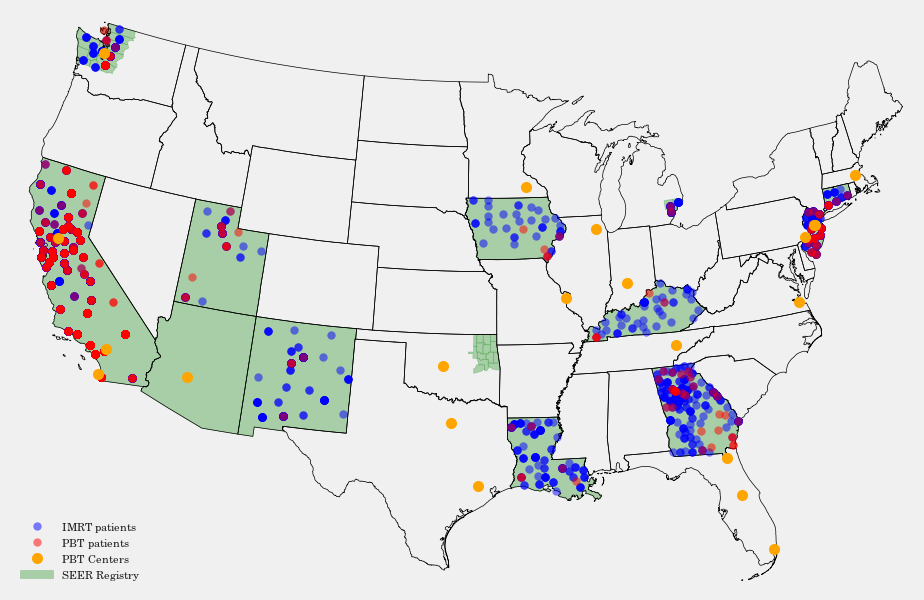

In [93]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

# create the map
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
#map.readshapefile('cb_2015_us_county_20m', name='counties', drawbounds=True)


# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

#map.readshapefile('cb_2015_us_county_20m', name='counties', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])



map.readshapefile('cb_2015_us_county_20m', name='counties', drawbounds=False)

# collect the county names from the shapefile attributes so we can
# look up the shape obect for a county by it's name
county_names = []
for shape_dict in map.counties_info:
    county_names.append(shape_dict['NAME'])
    

county_states = []
for shape_dict in map.counties_info:
    county_states.append(shape_dict['STATEFP'])
    
    
    
ax = plt.gca() # 

all_info = [county_names[i] + county_states[i] for i in range(len(county_names)) ]


# Washington state counties https://seer.cancer.gov/registries/sps.html

seg = map.counties[all_info.index('Skagit53')]
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=.3)
ax.add_patch(poly)


seg = map.counties[all_info.index('Clallam53')]
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=.3)
ax.add_patch(poly)


seg = map.counties[all_info.index('Grays Harbor53')]
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=.3)
ax.add_patch(poly)


seg = map.counties[all_info.index('Island53')]
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=.3)
ax.add_patch(poly)

seg = map.counties[all_info.index('Jefferson53')]  # Needs to be limited to Washington! There are many Jefferson Counties
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=.3)
ax.add_patch(poly)

seg = map.counties[all_info.index('King53')]  # Needs to be limited to Washington! There are many Jefferson Counties
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=.3)
ax.add_patch(poly)


seg = map.counties[all_info.index('Kitsap53')]  # Needs to be limited to Washington! There are many Jefferson Counties
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=.3)
ax.add_patch(poly)


seg = map.counties[all_info.index('Mason53')]  # Needs to be limited to Washington! There are many Jefferson Counties
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=.3)
ax.add_patch(poly)


seg = map.counties[all_info.index('Pierce53')]  # Needs to be limited to Washington! There are many Jefferson Counties
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=.3)
ax.add_patch(poly)


seg = map.counties[all_info.index('San Juan53')]  # Needs to be limited to Washington! There are many Jefferson Counties
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=.3)
ax.add_patch(poly)


seg = map.counties[all_info.index('Snohomish53')]  # Needs to be limited to Washington! There are many Jefferson Counties
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=.3)
ax.add_patch(poly)


seg = map.counties[all_info.index('Thurston53')]  # Needs to be limited to Washington! There are many Jefferson Counties
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=.3)
ax.add_patch(poly)


seg = map.counties[all_info.index('Whatcom53')]  # Needs to be limited to Washington! There are many Jefferson Counties
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=.3)
ax.add_patch(poly)


# Cherokee Nation Registry a 7,000 square mile region which involves fourteen Oklahoma counties. state fp: 40
# https://seer.cancer.gov/registries/cherokee_nation.html
# Adair, Cherokee, Craig, Delaware, Mayes, McIntosh, Muskogee, Nowata, Ottawa, Rogers, Sequoyah, Tulsa
# Wagoner, Washington

cherokeenames = ['Adair40','Cherokee40','Craig40','Delaware40','Mayes40',
                'McIntosh40','Muskogee40','Nowata40','Ottawa40','Rogers40',
                'Sequoyah40','Tulsa40','Wagoner40','Washington40']

for cherokeename in cherokeenames:
    seg = map.counties[all_info.index(cherokeename)]  # Needs to be limited to Washington! There are many Jefferson Counties
    poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=.3)
    ax.add_patch(poly)
    
    
detroitnames = ['Macomb26','Oakland26','Wayne26']

for detroitname in detroitnames:
    seg = map.counties[all_info.index(detroitname)]  # Needs to be limited to Washington! There are many Jefferson Counties
    poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=.3)
    ax.add_patch(poly)

    
    
    

# get New Mexico and draw the filled polygon
seg = map.states[state_names.index('New Mexico')]
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=0.3)
ax.add_patch(poly)

# get California and draw the filled polygon
seg = map.states[state_names.index('California')]
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=0.3)
ax.add_patch(poly)


# get Arizona and draw the filled polygon
seg = map.states[state_names.index('Arizona')]
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=0.3)
ax.add_patch(poly)

# get Utah and draw the filled polygon
seg = map.states[state_names.index('Utah')]
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=0.3)
ax.add_patch(poly)



# get Louisiana and draw the filled polygon
seg = map.states[state_names.index('Louisiana')]
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=0.3)
ax.add_patch(poly)


# get Iowa and draw the filled polygon
seg = map.states[state_names.index('Iowa')]
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=0.3)
ax.add_patch(poly)

# get Kentucky and draw the filled polygon
seg = map.states[state_names.index('Kentucky')]
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=0.3)
ax.add_patch(poly)


# get Georgia and draw the filled polygon
seg = map.states[state_names.index('Georgia')]
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=0.3)
ax.add_patch(poly)


# get New Jersey and draw the filled polygon
seg = map.states[state_names.index('New Jersey')]
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=0.3)
ax.add_patch(poly)


# get Connectucut and draw the filled polygon
seg = map.states[state_names.index('Connecticut')]
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=0.3,label='SEER Registry')
ax.add_patch(poly)




# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = map(dfalltreatment['lng_1'].values, dfalltreatment['lat_1'].values)
xc, yc = map(dfallcontrol['lng_1'].values, dfallcontrol['lat_1'].values)
xcenters, ycenters = map(center_lngs, center_lats)

# Plot them using round markers of size 6
#m.plot(x, y, 'ro', markersize=8,alpha=.7)
map.plot(xc,yc, 'bo', markersize=6,alpha=.5,label='IMRT patients')
map.plot(x, y, 'ro', markersize=6,alpha=.5,label='PBT patients')
map.plot(xcenters, ycenters, 'o',color='orange', markersize=8,label='PBT Centers')



plt.legend(loc='lower left')
plt.savefig('continental_map.png')
#plt.title("Locations of Patients (Continental US) red is treatment group\nblue is control group white "+\
#         "PBT centers")

# <font color="#E56717">It is informative to plot the locations of the matched PBT and IMRT patients on a map, along with the location of the PBT centers</font>

* <span style="font-size:1.7em;">Knoxville, TN; Warrenville, IL; Philadelphia, PA; Seattle, WA</span>
* <span style="font-size:1.7em;">Loma Linda, CA; San Diego, CA; Orlando, FL; Bloomington, IN (now closed)</span>
* <span style="font-size:1.7em;">Rochester, MN; New Brunswick, NJ; Houston, TX; St. Louis, MO</span>
* <span style="font-size:1.7em;">Miami, FL; Davis, CA; Dallas Fort-Worth, TX; Boston, MA</span>
* <span style="font-size:1.7em;">Somerset, NJ; Oklahoma City, OK; Jacksonville, FL; Phoenix, AZ</span>
* <span style="font-size:1.7em;">Hampton, VA</span>

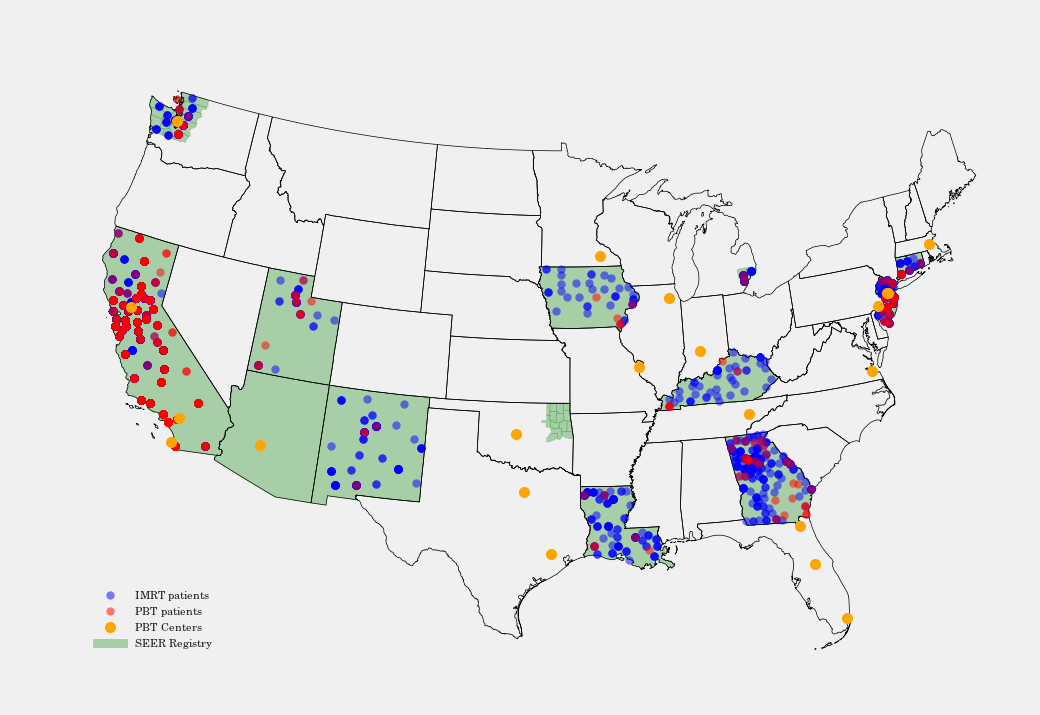

In [94]:
Image(filename="continental_map.png",embed=True)

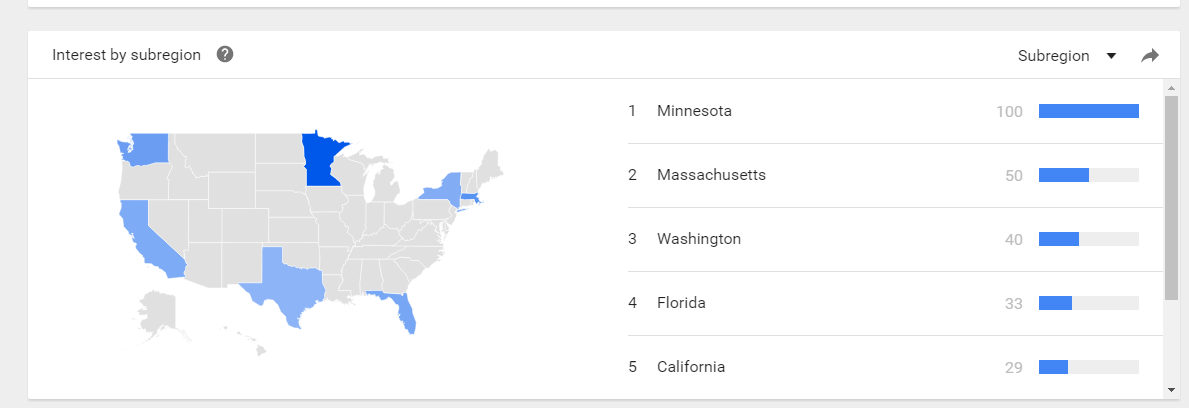

In [95]:
Image('google_trends.png',embed=True) # google trends result "proton beam therapy"

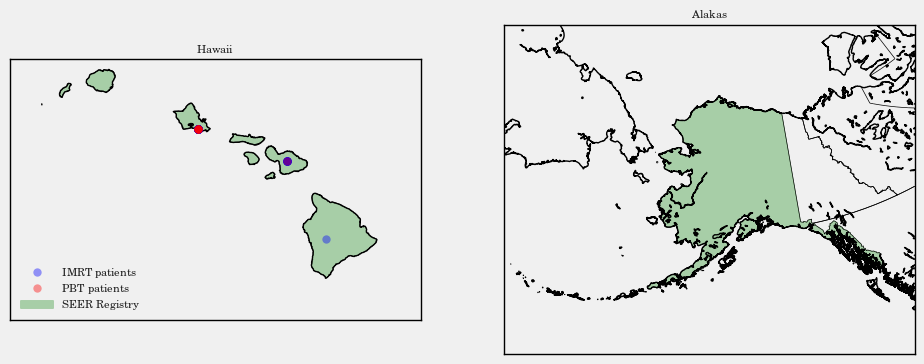

In [96]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

#fig = plt.figure(figsize=(8,8))
fig = plt.figure()

ax = fig.add_subplot(121)
ax.set_title("Hawaii")

my_map = Basemap(projection='lcc', lat_0=20.9, lon_0=-156.8,
    resolution = 'h', area_thresh = 100,
    llcrnrlon=-161, llcrnrlat=18.2,
    urcrnrlon=-154, urcrnrlat=22.4)
 
my_map.drawcoastlines()
#my_map.drawcountries()
#my_map.fillcontinents(color='coral')
my_map.drawstates()
my_map.drawmapboundary()

# load the shapefile, use the name 'states'
my_map.readshapefile('st99_d00', name='states', drawbounds=True)

#ax = plt.gca() # 


my_map.fillcontinents(color='green',alpha=0.3)
# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in my_map.states_info:
    state_names.append(shape_dict['NAME'])
    

# get Georgia and draw the filled polygon
seg = my_map.states[state_names.index('Hawaii')]
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=0.3,
              label='SEER Registry')
ax.add_patch(poly)

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = my_map(dfalltreatment['lng_1'].values, dfalltreatment['lat_1'].values)
xc, yc = my_map(dfallcontrol['lng_1'].values, dfallcontrol['lat_1'].values)
xcenters, ycenters = my_map(center_lngs, center_lats)

# Plot them using round markers of size 6
#m.plot(x, y, 'ro', markersize=8,alpha=.7)
my_map.plot(xc,yc, 'bo', markersize=6,alpha=.4,label='IMRT patients')
my_map.plot(x, y, 'ro', markersize=6,alpha=.4,label='PBT patients')
#my_map.plot(xcenters, ycenters, 'o',color='orange', markersize=12,label='PBT Centers')

plt.legend(loc='lower left');


ax = fig.add_subplot(122)
ax.set_title('Alakas')


# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='lcc', lat_0=64, lon_0=-152,
    resolution = 'h', area_thresh = 100,
    llcrnrlon=-179.8, llcrnrlat=45.49,
    urcrnrlon=-100.59, urcrnrlat=71)
 
my_map.drawcoastlines()
#my_map.drawcountries()
#my_map.fillcontinents(color='coral')
my_map.drawstates()
my_map.drawmapboundary()

# load the shapefile, use the name 'states'
my_map.readshapefile('st99_d00', name='states', drawbounds=True)

#ax = plt.gca() # 

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in my_map.states_info:
    state_names.append(shape_dict['NAME'])
    

# get Georgia and draw the filled polygon
seg = my_map.states[state_names.index('Alaska')]
poly = Polygon(seg, facecolor='green',edgecolor='green',alpha=0.3,
              label='SEER Registry')
ax.add_patch(poly)

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = my_map(dfalltreatment['lng_1'].values, dfalltreatment['lat_1'].values)
xc, yc = my_map(dfallcontrol['lng_1'].values, dfallcontrol['lat_1'].values)
xcenters, ycenters = my_map(center_lngs, center_lats)

# Plot them using round markers of size 6
#m.plot(x, y, 'ro', markersize=8,alpha=.7)
my_map.plot(xc,yc, 'bo', markersize=6,alpha=.4,label='IMRT patients')
my_map.plot(x, y, 'ro', markersize=6,alpha=.4,label='PBT patients')
my_map.plot(xcenters, ycenters, 'o',color='orange', markersize=12,label='PBT Centers')
plt.savefig('alaska_hawaii.png')
#plt.legend(loc='lower left')

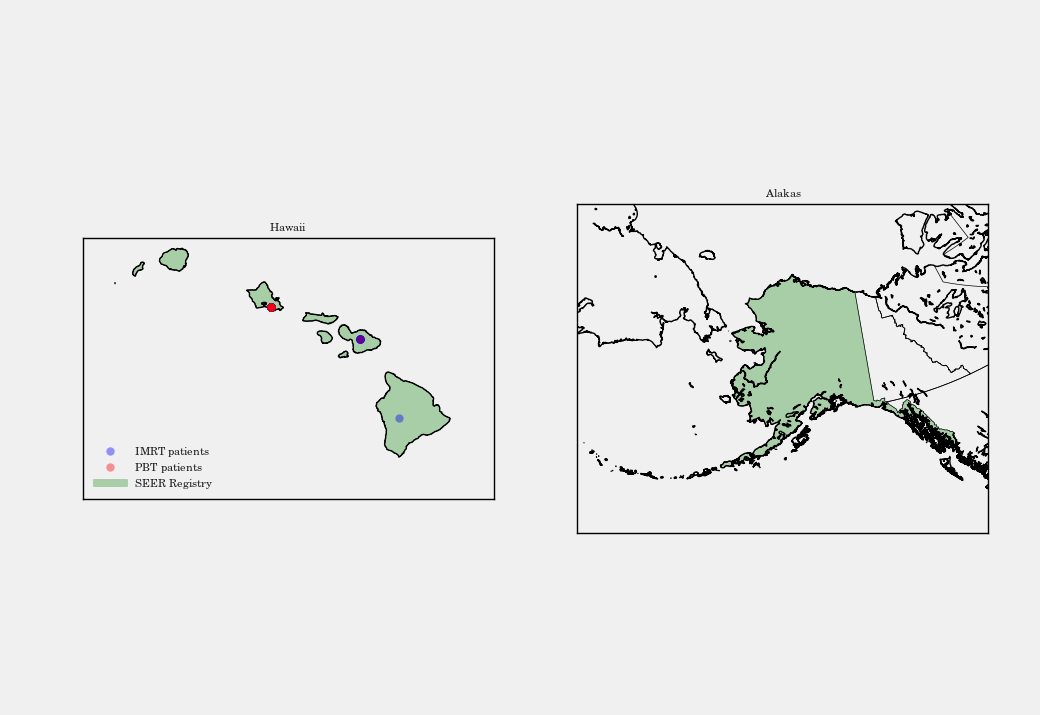

In [97]:
Image(filename="alaska_hawaii.png",embed=True)

# <font color="#E56717">Survival Post matching:</font>

## Intermediate risk patients; better survival for PBT

* <span style="font-size:1.7em;">736 intermediate risk PBT patients; 3591 intermediate risk patients; p-value = 0.02</span>

## All patients; visually better survival for PBT, but not statistically significant 

* <span style="font-size:1.7em;">For all patients, the p-value associated with the log-rank test: 0.06</span>

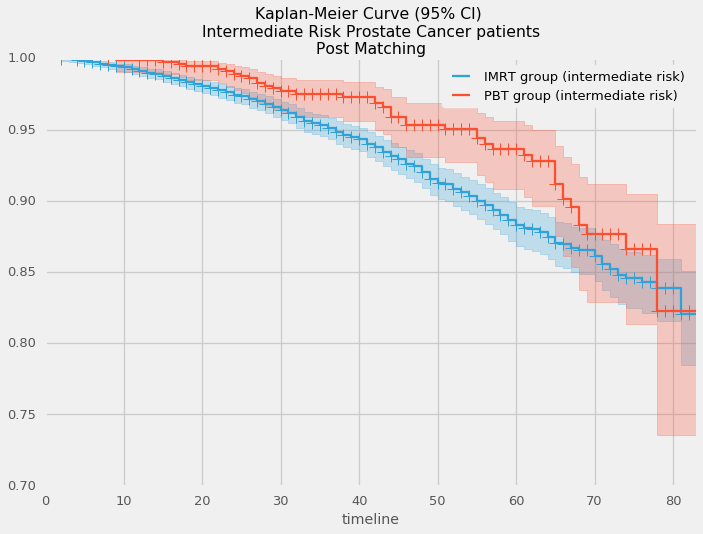

In [98]:
Image(filename="intermediate_risk_post_matching.png",embed=True)

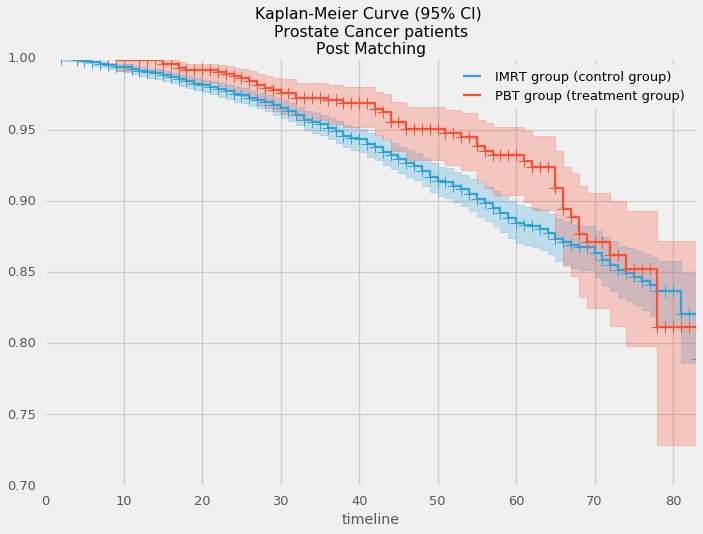

In [99]:
Image(filename="all_km_post_matching.png",embed=True)

# <font color="#E56717">Complication rates: Different complication rates as defined by bundles of ICD 9 diagnosis and procedure codes as well as HCPCS codes in the claims files for dates after the prostate cancer DX</font>

<span style="font-size:1.7em;">These codes were compiled by MDs with subject expertise. Eliminate common procedures such as colonoscopy which may be used as routine screening, or as information gathering when diagnosising a treatment-induced complication.</span>

### <font color="steelblue">Complications considered</font>

* <span style="font-size:1.7em;">Rectal, bladder, erectile dysfunction/impotence, endocrine system, bone, and renal dysfunction</span>



# <font color="#E56717">Compare the complication rates using three different methods:</font>

* <span style="font-size:1.7em;">Jackknife (leave-one-out resampling)</span>
* <span style="font-size:1.7em;">Bayesian A/B testing</span>
* <span style="font-size:1.7em;">Kaplan-Meier time-to-event as in the survival curves, where the event now is the triggering of one of the codes associated with the given complication</span>

The _jackknife_ is a more orderly version of the bootstrap. Instead of generating a setof random samples from $X_1, \cdots, X_n$ we generate n samples of size n-1 by leaving out one sample at a time.

* Observe a sample $X = \{ X_1, \cdots, X_n \}$
* Compute $\hat{\Theta}(X)$ a function of the data which estimates some parameter $\Theta$ of the model
* For $i=1$up to n
    * generate a _jackknife_ sample $X^{-i} = \{X_1, \cdots, X_{i-1},X_{i+1}, \cdots, X_n \}$ by leaving out the ith observation 
    * calculate $\hat{\Theta}_{i}$ by applying the estimate process to the jackknife sample
* calculate the _jackknifed estimate_:

$\hat{\Theta}_{\ast} = \frac{1}{n} \sum_{i=1}^{n} \hat{\Theta}_{-i}$

* and the _jackknife estimate of the variance_:   (the standard error is just the square root of this quantity; can construct CI intervals)

$\frac{n-1}{n} \sum_{i=1}^{n} ( \hat{\Theta}_{-i} - \hat{\Theta}_{\ast})^{2}$

https://people.duke.edu/~ccc14/sta-663/ResamplingAndMonteCarloSimulations.html

In [80]:
IFrame('https://people.duke.edu/~ccc14/sta-663/ResamplingAndMonteCarloSimulations.html',
       width=800,height=400)

# <font color="#E56717">Rectal complication rates</font>

* <span style="font-size:1.7em;">PBT point estimate: 278 / (1000  person  years)</span>
* <span style="font-size:1.7em;">IMRT point estimate: 336 / (1000  person  years)</span>

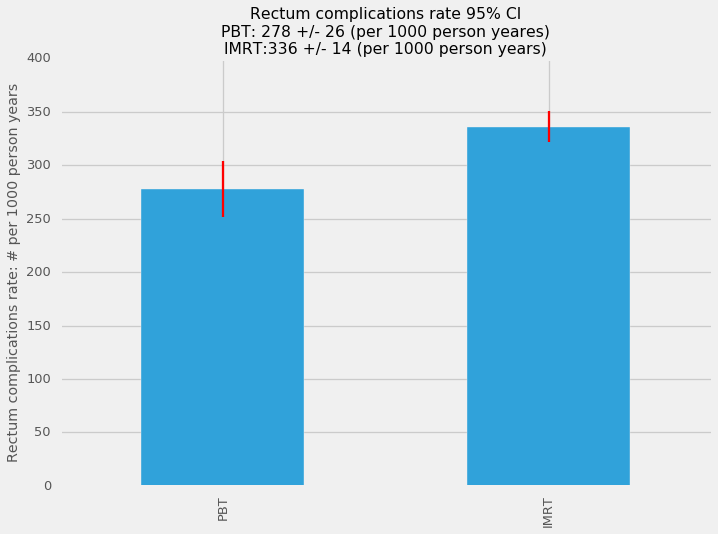

In [86]:
Image('rectum_comp.png',embed=True)

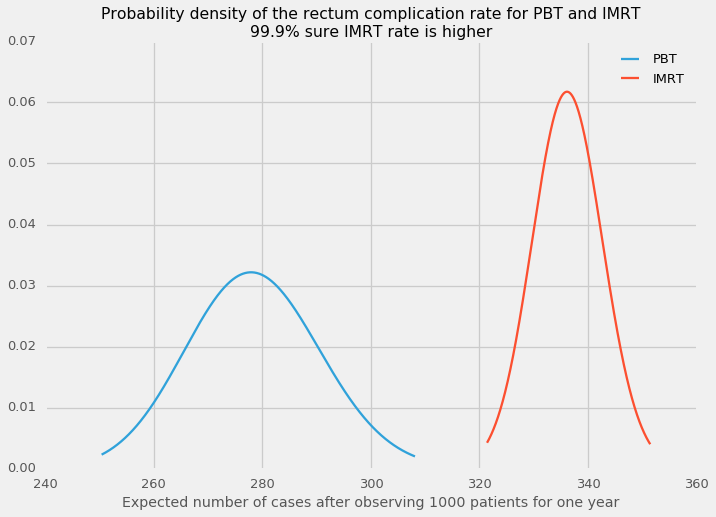

In [85]:
Image('rectum_comp_ab.png',embed=True)

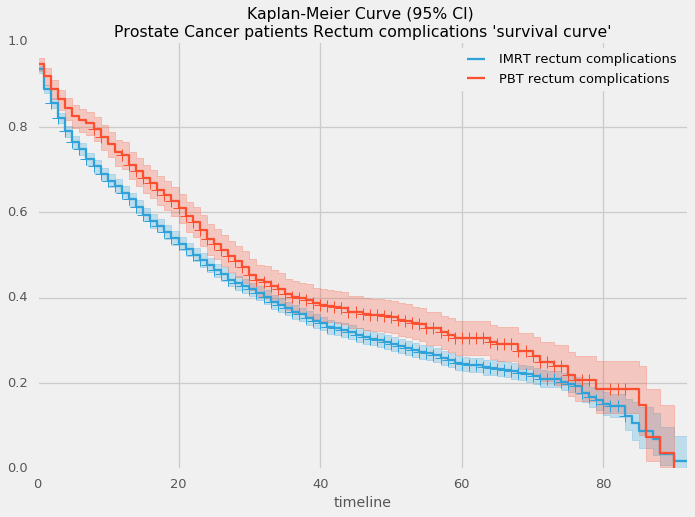

In [83]:
Image('rectum_comp_km.png',embed=True)

# <font color="#E56717">Bladder complication rates:</font>

* <span style="font-size:1.7em;">PBT point estimate: 58 / (1000  person  years)</span>
* <span style="font-size:1.7em;">IMRT point estiamte: 96 / (1000  person  years)</span>

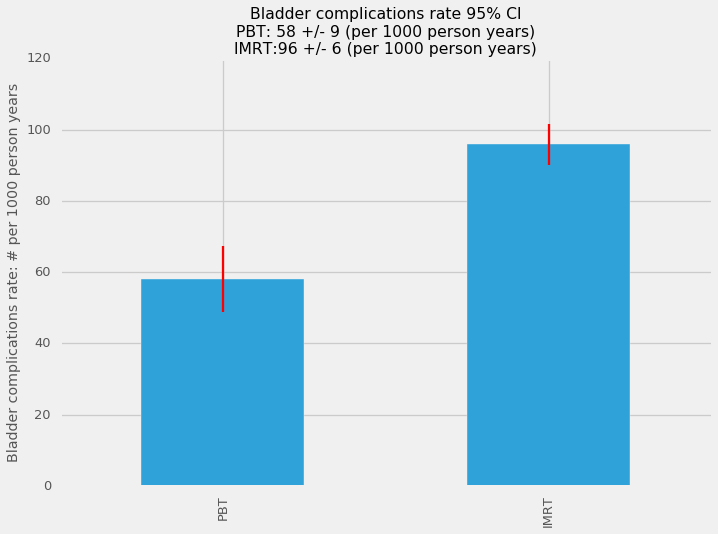

In [87]:
Image('bladder_comp.png',embed=True)

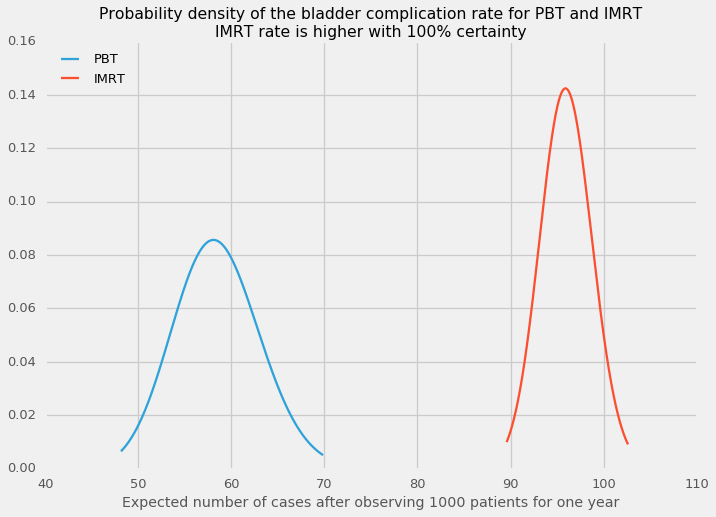

In [88]:
Image('bladder_comp_ab.png',embed=True)

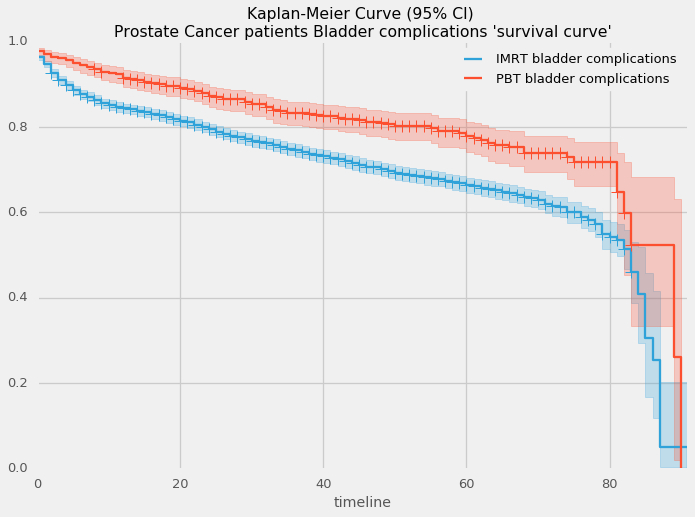

In [89]:
Image('bladder_comp_km.png',embed=True)

# <font color="#E56717">Endocrine complication rates</font>

* <span style="font-size:1.7em;">PBT point estimate: 31 / (1000  person  years)</span>
* <span style="font-size:1.7em;">IMRT point estimate: 46 / (1000  person  years)</span>

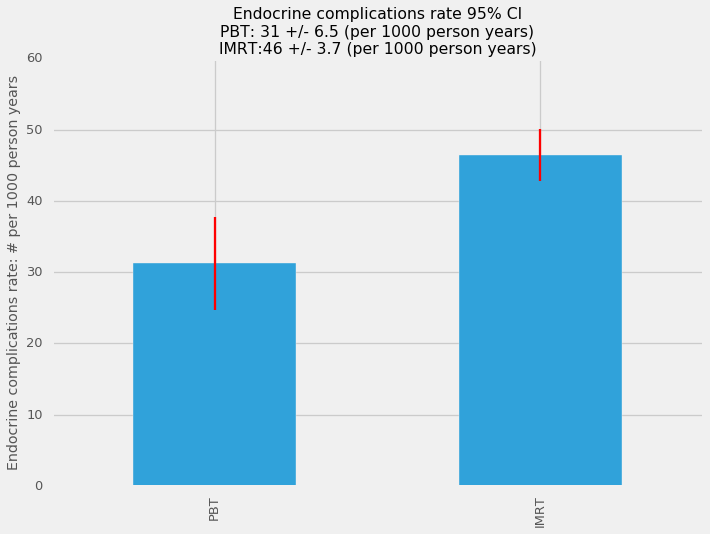

In [90]:
Image('endocrine_comp.png',embed=True)

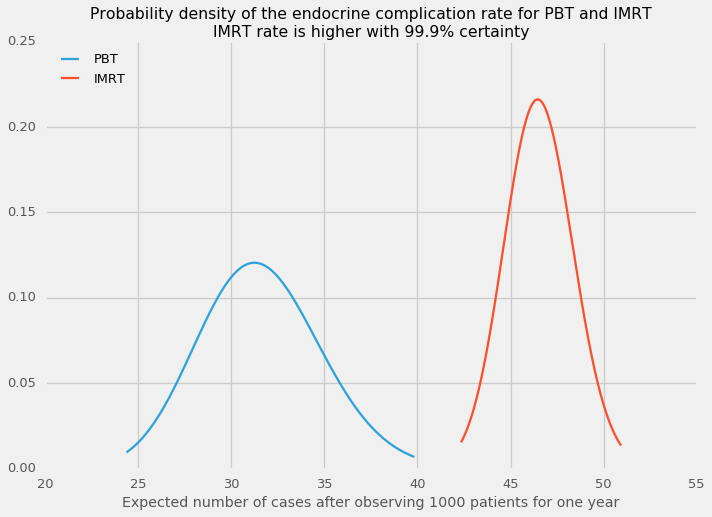

In [91]:
Image('endocrine_comp_ab.png',embed=True)

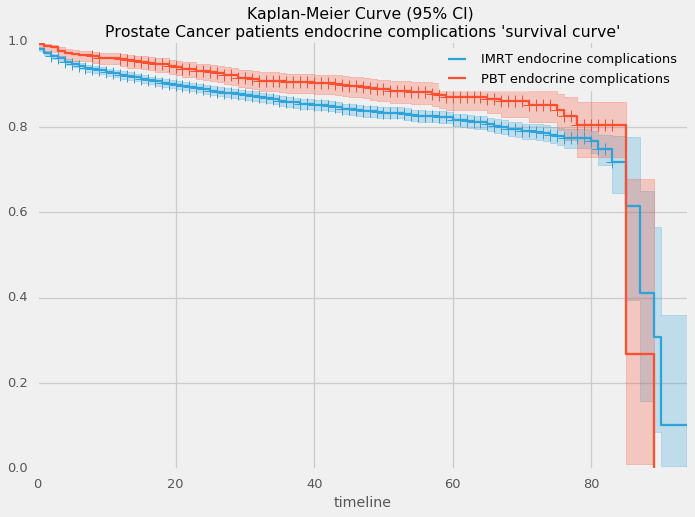

In [92]:
Image('endocrine_comp_km.png',embed=True)

# <font color="#E56717">Renal complication rates:</font>

* <span style="font-size:1.7em;">PBT point estimate: 60 / (1000  person  years)</span>
* <span style="font-size:1.7em;">IMRT point estimate: 85 / (1000  person  years)</span>

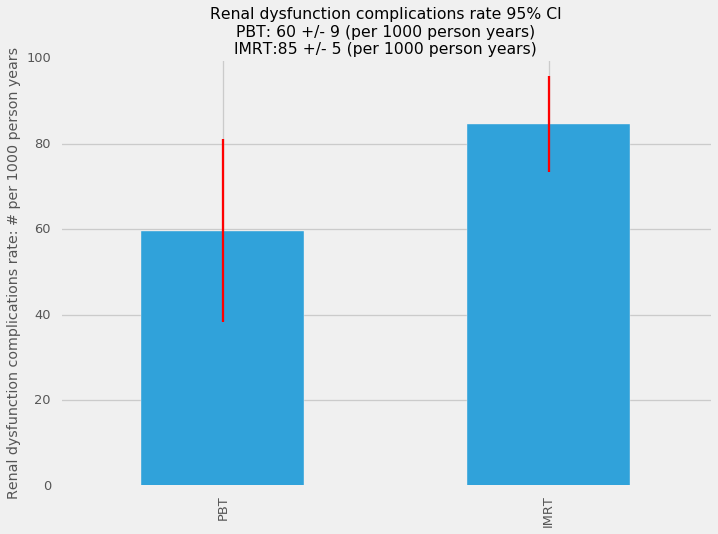

In [93]:
Image('renal_comp.png',embed=True)

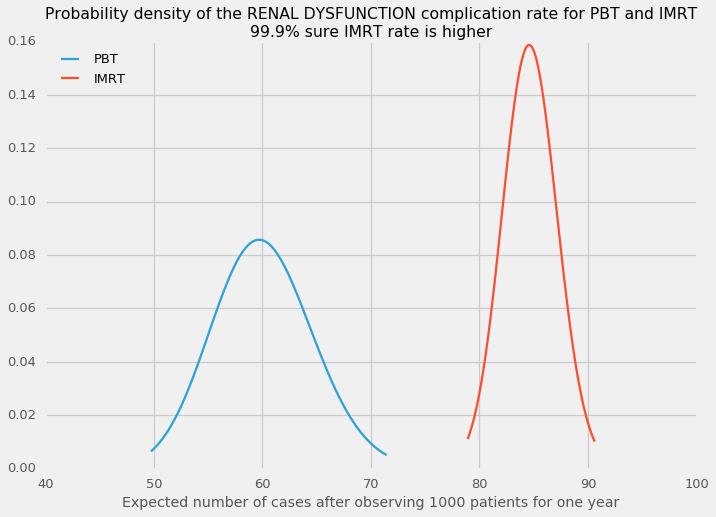

In [94]:
Image('renal_comp_ab.png',embed=True)

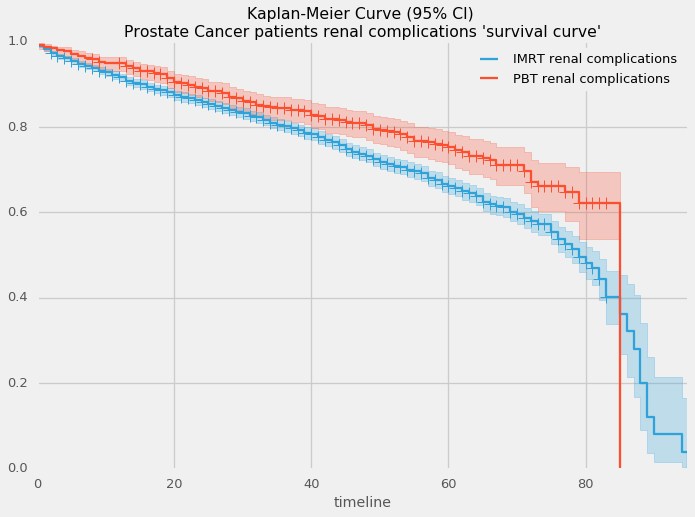

In [97]:
Image('renal_comp_km.png',embed=True)

# <font color="#E56717">Do these complication rates result in higher costs for IMRT patients such that the offset the difference in treatment costs (between PBT and IMRT)?</font>

## Take advantage of the patient matching results to anwer this question

<span style="font-size:1.7em;">For each PBT patient, create a plot of its cumulative total costs over time, and compare it with each of its IMRT matches. The cumulative cost curves are measured in months after DX and go out to the minimum number of months of each curve (they are truncated either due to censoring or death)</span>

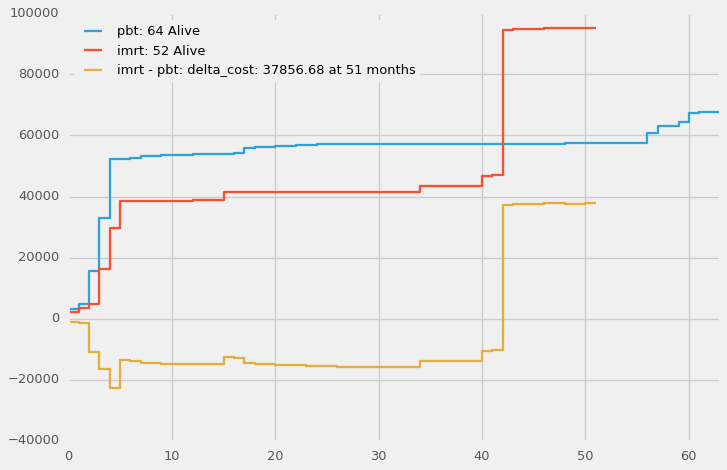

In [113]:
Image('cost_example.png',embed=True)

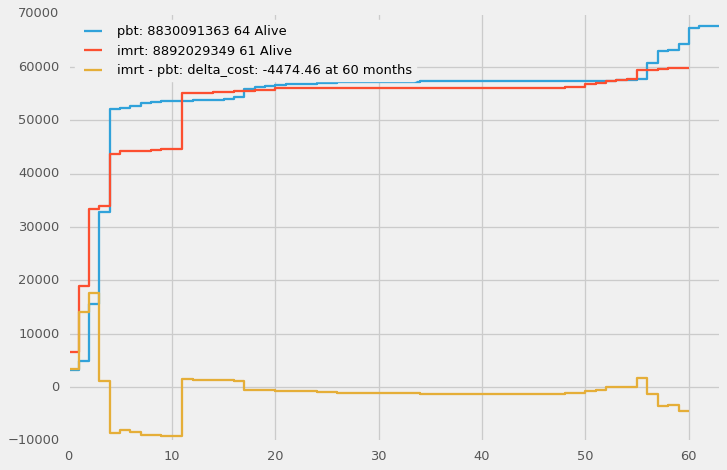

In [114]:
Image('cost_example_2.png',embed=True)

# <font color="#E56717">Need a summary view: Can also just capture the difference in cumulative cost at the end of the curves (the follow up months) for all of these individual curves</font>


<span style="font-size:1.7em;">Approximately 30% of these points have the IMRT cumulative cost greater than the PBT cumulative cost</span>

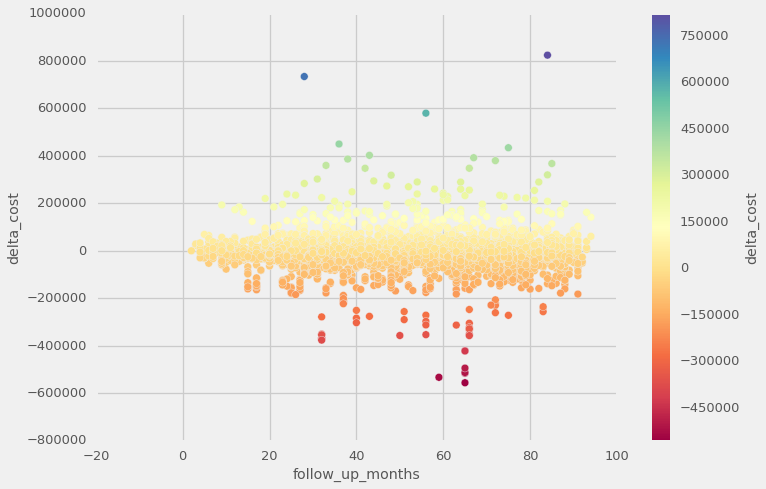

In [116]:
Image('scatter_cost.png',embed=True)

# <font color="#E56717">Can also use the set of difference curves to see how they vary with month</font>

<span style="font-size:1.7em;">For the entire set of IMRT - PBT cumulative cost difference curves, plot difference percentiles at each month</span>

In [120]:
dfdiff = pd.read_csv('dfdiff.csv')
qp5 = dfdiff.quantile(q=0.5,axis=1)
qp6 = dfdiff.quantile(q=.6,axis=1)
qp7 = dfdiff.quantile(q=.7,axis=1)
qp8 = dfdiff.quantile(q=.8,axis=1)
qp4 = dfdiff.quantile(q=0.4,axis=1)
qp3 = dfdiff.quantile(q=0.3,axis=1)
qp2 = dfdiff.quantile(q=0.2,axis=1)

bymonth = pd.DataFrame({'20th percnentile': qp2,
                        '30th percentile': qp3,
    '40th percentile': qp4,
    '50th percentile': qp5,
                       '60th percentile': qp6,
                       '70th percentile': qp7,
                       '80th percentile': qp8})




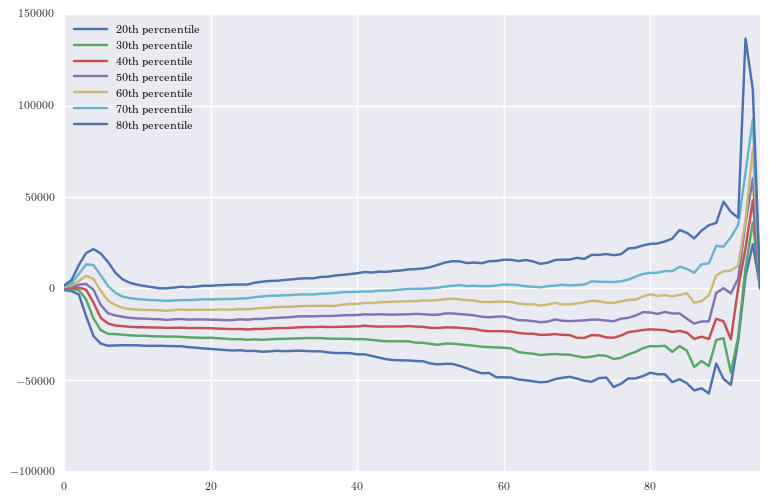

In [121]:
bymonth.plot();

# <font color="steelblue">Thank you!</font>